In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=4.5)
import cufflinks as cf
from  plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [10]:
data_raw = pd.read_csv("DNI_Tags_1year_10min.csv")
data = data_raw.copy(deep=True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])#,format='%m/%d/%Y %H:%M' )
data = data.set_index('Timestamp')
data = data.loc[~data.index.duplicated(keep='first')]
expand_date = pd.date_range(data.index.min(), data.index.max(), freq=(str(10)+'min'))
expand_date = pd.to_datetime(expand_date)
data = data.reindex(expand_date)
data = data.fillna(method = "ffill")
data = data.dropna()
data = data.reset_index().rename(columns={'index': 'Timestamp'})

In [15]:
data2 = pd.read_csv("noor_weather_data_per_10.csv")
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

In [16]:
Combined_data = pd.merge(data,data2,how = "inner",on = "Timestamp")

In [18]:
Combined_data.to_csv("DNI_Data_Along_With_Weather.csv",index = False)

Text(0.5, 1, 'Sensors and weather correlation')

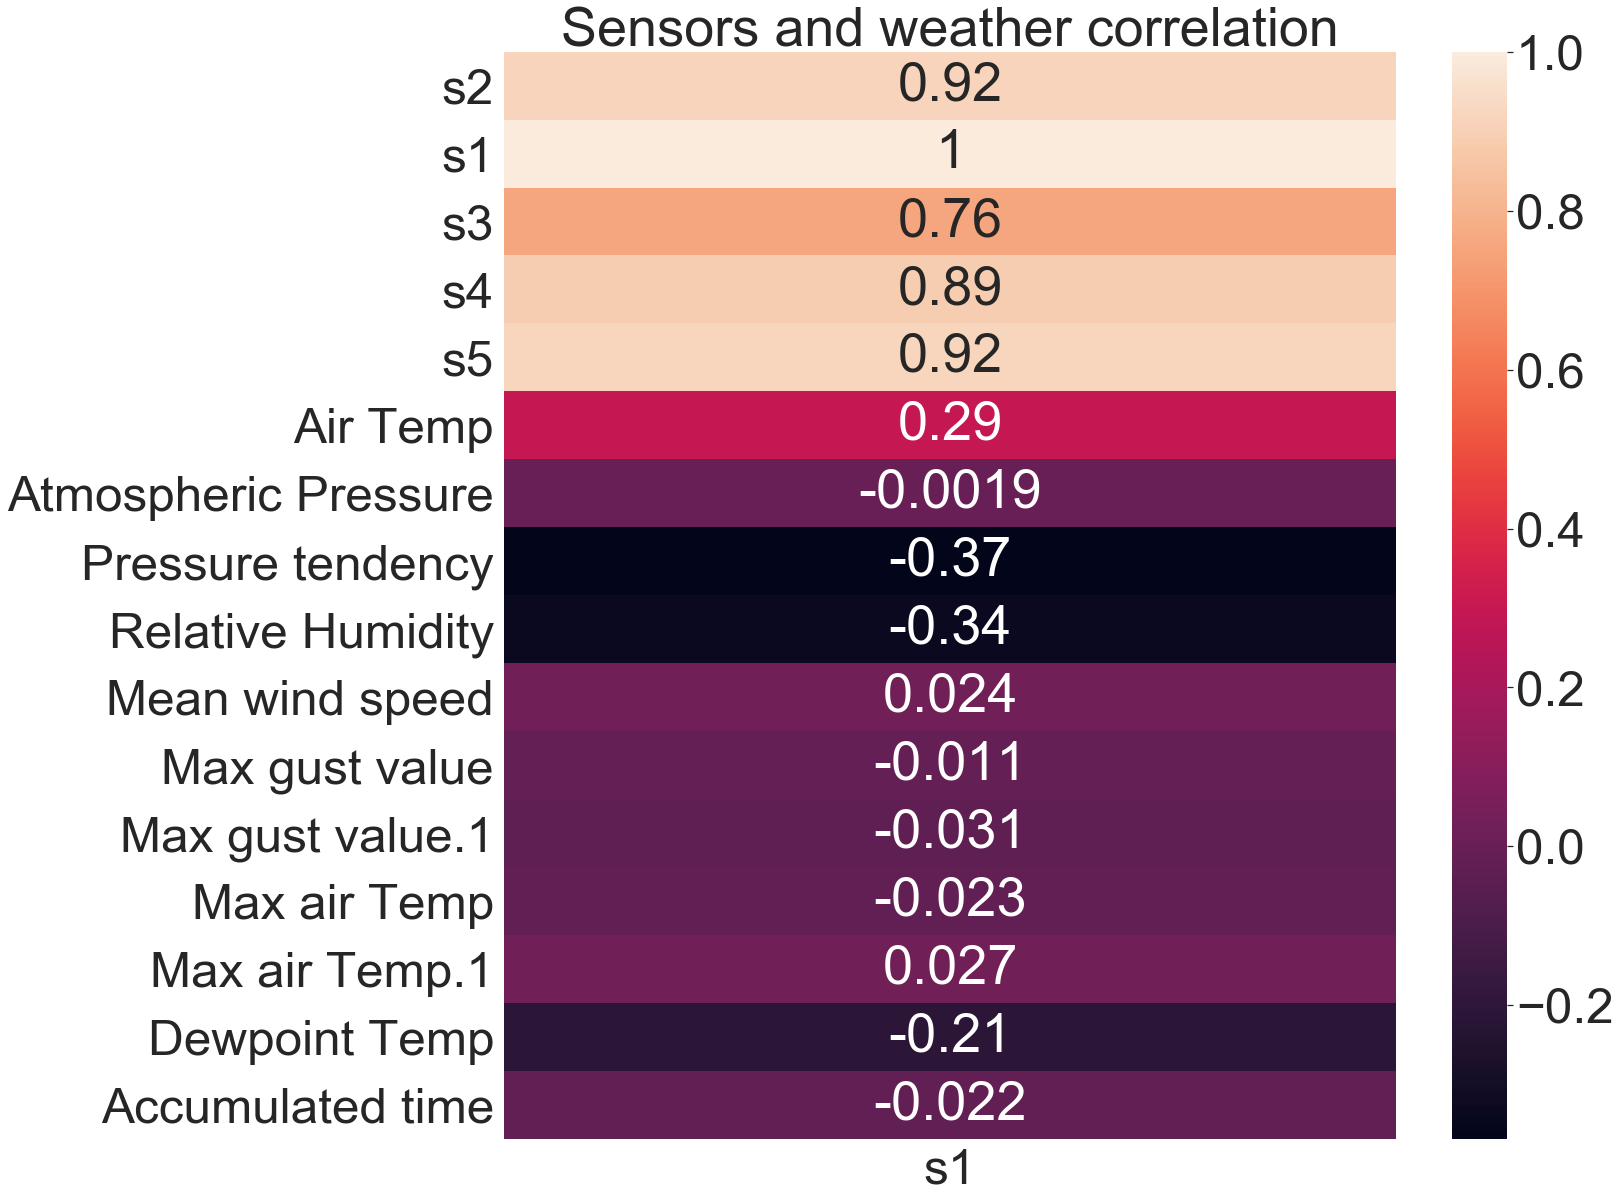

In [21]:
cor = Combined_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor[["s1"]],annot = True)
plt.title("Sensors and weather correlation")